# Simple Logistic Regression

Logistic Regression can be used for binary classification or multi-class classification. Our main goal is to change parameters w and b to reduce the loss function (make it as small as possible).

Used literature:
    - [Loss Function (Part II): Logistic Regression](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11)

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read data function. I use example dataset from Wikipedia.

In [2]:
def read_data(filename):
    return pd.read_csv(filename)

Sigmoid function to convert continuos variable to value between 0 and 1.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Plot model function.

In [4]:
def plot_model(X_train, Y_train, w, b, X_test = [], Y_test = []):
    x = np.arange(0, 6, 0.1)
    y = sigmoid(w * x + b)
    
    if len(X_test) > 0:
        plt.scatter(X_test, Y_test, c=list(map(lambda x: 'red' if x == 0 else 'blue', Y_test)))
        
    plt.scatter(X_train, Y_train, c=list(map(lambda x: 'red' if x == 0 else 'blue', Y_train)))
    plt.plot(x, y)
    plt.show()

Initialize parameters w, b and learning rate. Read data from `dataset.csv` file.

In [5]:
w = 0.1
b = 0
l = 0.1

dt = read_data('dataset.csv')
ci = int(len(dt) * 0.8)

X_train = dt.iloc[:ci]['Hours']
Y_train = dt.iloc[:ci]['Passed']

X_test = dt.iloc[ci:]['Hours']
Y_test = dt.iloc[ci:]['Passed']

Iterate n-times to train our model. Update parameters and then plot the model.

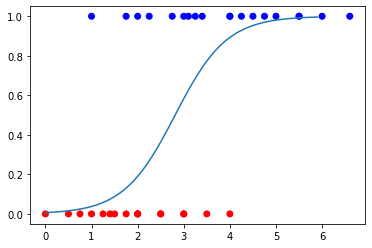

In [6]:
for i in range(10000):
    z = X_train * w + b
    a = sigmoid(z)
    
    dz = a - Y_train
    dw = 1 / len(X_train) * np.sum(X_train * dz)
    db = 1 / len(X_train) * np.sum(dz)
    
    w -= l * dw
    b -= l * db

plot_model(X_train, Y_train, w, b, X_test, Y_test)

Counting total error on test set.

In [7]:
f'Total errors: {sum(abs(round(sigmoid(X_test * w + b), 0) - Y_test))}'

'Total errors: 3.0'